In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Membaca data dari file CSV
file_name = '../../tamlops/data/infra/fcfs-burst/gpu.csv'
df = pd.read_csv(file_name)  # Ganti 'nama_file.csv' dengan nama file CSV Anda
df = df[df['timestamp'] != 'timestamp']
print(df.head(5))

                 timestamp             name  pstate  temperature.gpu  \
0  2023/12/07 15:01:28.847   A100-SXM4-40GB      P0               31   
1  2023/12/07 15:01:28.848   A100-SXM4-40GB      P0               28   
2  2023/12/07 15:01:28.850   A100-SXM4-40GB      P0               39   
3  2023/12/07 15:01:28.852   A100-SXM4-40GB      P0               37   
4  2023/12/07 15:01:28.853   A100-SXM4-40GB      P0               53   

   utilization.gpu [%]  utilization.memory [%]  memory.total [MiB]  \
0                 40 %                    14 %           40537 MiB   
1                  0 %                     0 %           40537 MiB   
2                  0 %                     0 %           40537 MiB   
3                 36 %                    15 %           40537 MiB   
4                 98 %                    50 %           40537 MiB   

   memory.free [MiB]  memory.used [MiB]  
0          15459 MiB          25078 MiB  
1          34132 MiB           6405 MiB  
2           5727 MiB

In [73]:
print(df.columns)

Index(['timestamp', ' name', ' pstate', ' temperature.gpu',
       ' utilization.gpu [%]', ' utilization.memory [%]',
       ' memory.total [MiB]', ' memory.free [MiB]', ' memory.used [MiB]'],
      dtype='object')


In [74]:
# Beri labeling GPU
df.reset_index(drop=True, inplace=True)

counter = 0
for index, row in df.iterrows():
    if counter == 8:
        counter = 0
    df.at[index, ' name'] =  df.at[index, ' name'] + "-" + str(counter)
    counter += 1
print(df.head(10))

                 timestamp               name  pstate  temperature.gpu  \
0  2023/12/07 15:01:28.847   A100-SXM4-40GB-0      P0               31   
1  2023/12/07 15:01:28.848   A100-SXM4-40GB-1      P0               28   
2  2023/12/07 15:01:28.850   A100-SXM4-40GB-2      P0               39   
3  2023/12/07 15:01:28.852   A100-SXM4-40GB-3      P0               37   
4  2023/12/07 15:01:28.853   A100-SXM4-40GB-4      P0               53   
5  2023/12/07 15:01:28.855   A100-SXM4-40GB-5      P0               44   
6  2023/12/07 15:01:28.857   A100-SXM4-40GB-6      P0               50   
7  2023/12/07 15:01:28.858   A100-SXM4-40GB-7      P0               37   
8  2023/12/07 15:01:32.079   A100-SXM4-40GB-0      P0               31   
9  2023/12/07 15:01:32.081   A100-SXM4-40GB-1      P0               28   

   utilization.gpu [%]  utilization.memory [%]  memory.total [MiB]  \
0                 40 %                    14 %           40537 MiB   
1                  0 %                     0 

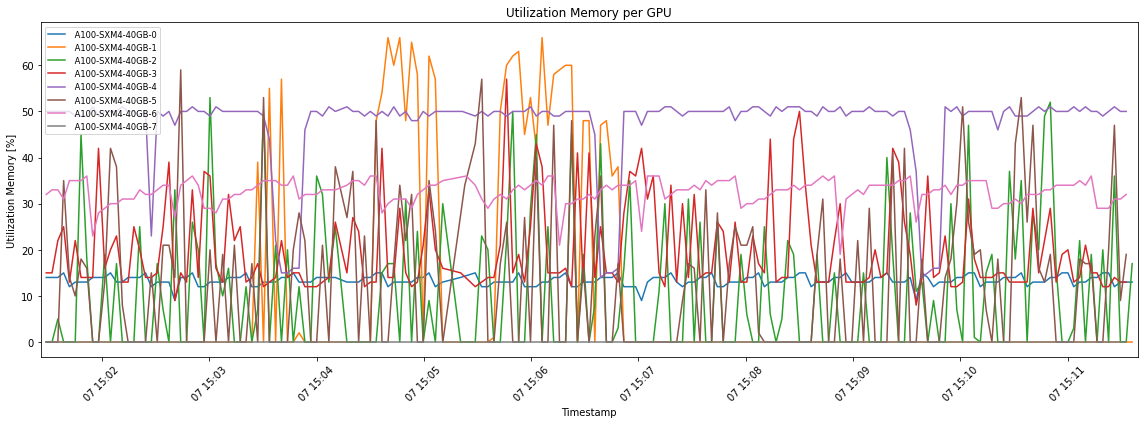

In [75]:
# Mengonversi kolom 'timestamp' ke dalam format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Mengelompokkan data berdasarkan nama GPU
grouped = df.groupby(' name')

# Plotting grafik untuk setiap GPU
plt.figure(figsize=(16, 6))

for name, group in grouped:
    plt.plot(group['timestamp'], group[' utilization.memory [%]'].str.rstrip(' %').astype(int), label=name)

plt.xlabel('Timestamp')
plt.ylabel('Utilization Memory [%]')
plt.title('Utilization Memory per GPU')
plt.legend(fontsize='small')
plt.xticks(rotation=45)
plt.gca().margins(x=0.005)
plt.tight_layout()
plt.show()